limited interfernece: 10000 unlimited interference: 32000
limited SM: 6000 unlimited SM: 10000
Plus 1: 42000
Event yield is: 0.085141905 .
Event yield is: 0.00022501772 .
Event yield is: 0.050693575 .
815.9727
1.9767979
903.34064
1.5244585
1083.661
0.5639082
x_bin_edges [ 40  60  80 100]
[40, 120]


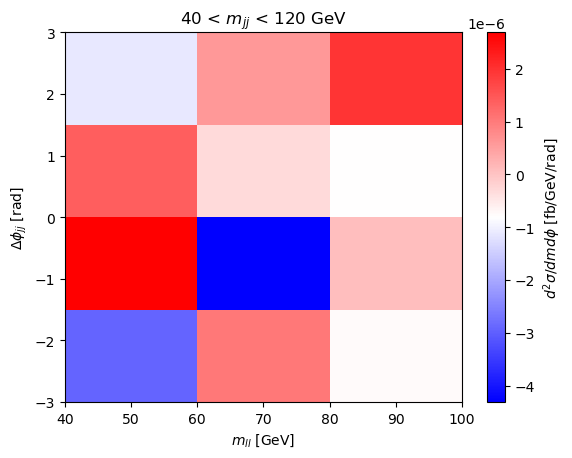

x_bin_edges [ 40  60  80 100]
[40, 120]


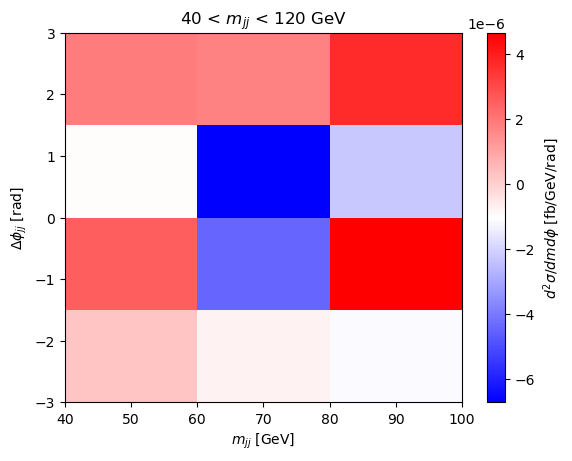

x_bin_edges [ 40  60  80 100]
[40, 120]


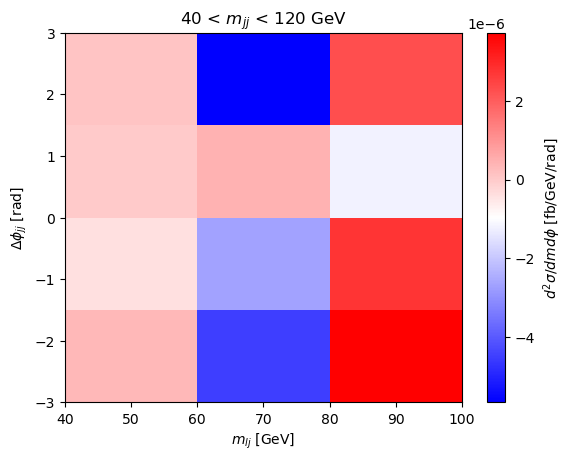

x_bin_edges [  0 140 280 420]
[0, 500]


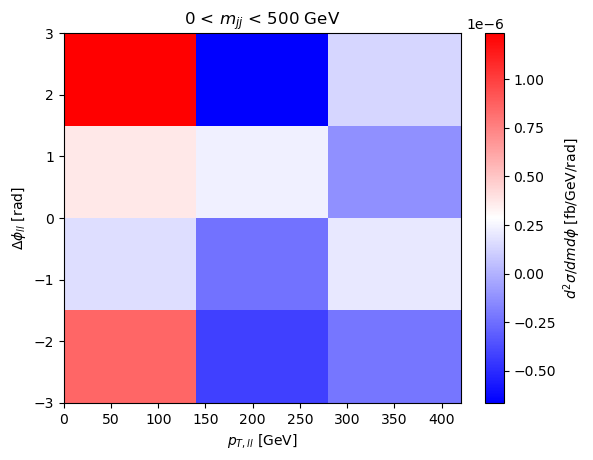

x_bin_edges [  0 140 280 420]
[0, 500]


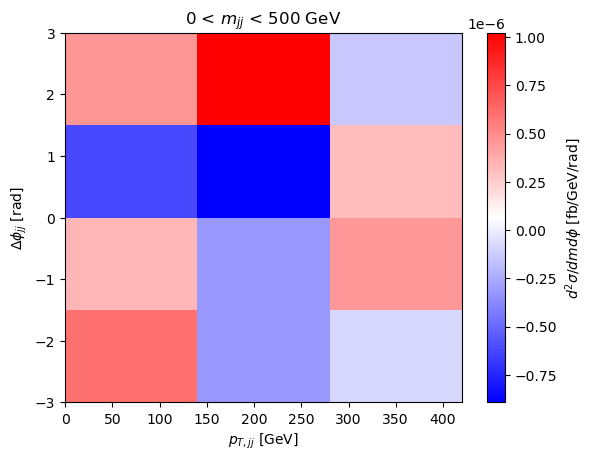

x_bin_edges [  0 140 280 420]
[0, 500]


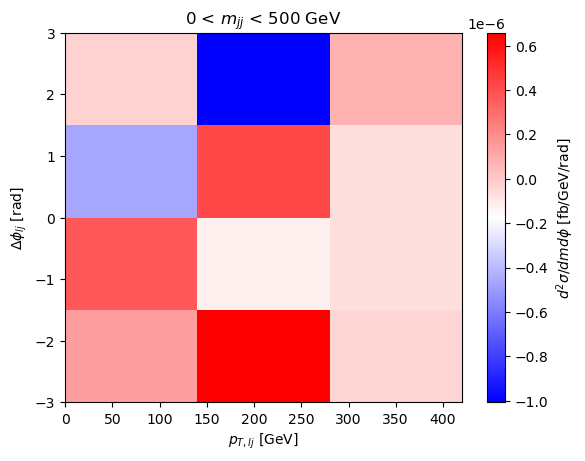

In [ ]:
import uproot
import awkward as ak
import vector
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import boost_histogram as bh

m_e = const.electron_mass / 1000
m_mu = 0.105658

def import_data():
    tree_plus_0 = uproot.open('../Delphes/delphes_output_WWjj_e+mu_smeft_cWtil_NP0.root:Delphes')
    plus_events_0 = tree_plus_0.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
                           'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
                           'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])
    
    tree_plus_1 = uproot.open('../Delphes/output_WWjj_e+mu_smeft_cWtil_NP1_tot.root:Delphes')
    plus_events_1 = tree_plus_1.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
                           'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
                           'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])
    
    tree_plus_2 = uproot.open('../Delphes/delphes_output_WWjj_e+mu_smeft_cWtil_NP2.root:Delphes')
    plus_events_2 = tree_plus_2.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
                           'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
                           'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])
    
    limited_tree_plus_0 = uproot.open('../Delphes/delphes_output_WWjj_e+mu_smeft_cWtil_NP0_m_jj=200_tot.root:Delphes')
    limited_plus_events_0 = limited_tree_plus_0.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
                           'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
                           'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])
    
    limited_tree_plus_1 = uproot.open('../Delphes/output_WWjj_e+mu_smeft_cWtil_NP1_m_jj=200_tot.root:Delphes')
    limited_plus_events_1 = limited_tree_plus_1.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
                           'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
                           'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])
    
    limited_tree_plus_2 = uproot.open('../Delphes/delphes_output_WWjj_e+mu_smeft_cWtil_NP2_m_jj=200.root:Delphes')
    limited_plus_events_2 = limited_tree_plus_2.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
                           'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
                           'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])

    total_plus_events_0 = ak.concatenate([plus_events_0, limited_plus_events_0], mergebool=True, highlevel=True)
    total_plus_events_1 = ak.concatenate([plus_events_1, limited_plus_events_1], mergebool=True, highlevel=True)
    total_plus_events_2 = ak.concatenate([plus_events_2, limited_plus_events_2], mergebool=True, highlevel=True)

    #tree_minus = uproot.open('../Delphes/delphes_output_WWjj_e-mu_smeft_cWtil_NP0.root:Delphes')
    #minus_events_0 = tree_minus.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
    #                       'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
    #                       'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])
    #
    #tree_minus_1 = uproot.open('../Delphes/delphes_output_WWjj_e-mu_smeft_cWtil_NP1.root:Delphes')
    #minus_events_1 = tree_minus_1.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
    #                       'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
    #                       'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.BTag',])
    #
    #tree_minus_2 = uproot.open('../Delphes/delphes_output_WWjj_e-mu_smeft_cWtil_NP2.root:Delphes')
    #minus_events_2 = tree_minus_2.arrays(['Event.Weight', 'Electron_size', 'Electron.Eta', 'Electron.PT',
    #                       'Electron.Phi', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
    #                       'Jet_size', 'Jet.PT', 'Jet.Eta', 'Jet.Phi','Jet.Mass','Jet.B',])

    #return limited_plus_events_0, limited_plus_events_1, limited_plus_events_2
    print("limited interfernece:", len(limited_plus_events_1),"unlimited interference:", len(plus_events_1))
    print("limited SM:", len(limited_plus_events_0),"unlimited SM:", len(plus_events_0))
    return total_plus_events_0, total_plus_events_1, total_plus_events_2

def di_invariant_mass_calc(particles):
    diparticle_mass = (particles[:, 0] + particles[:, 1]).mass  # calculates invariant mass for electron-electron or muon-muon pairs
    return diparticle_mass

def cross_invariant_mass_calc(particle_1, particle_2):
    diparticle_mass = (particle_1[:, 0] + particle_2[:, 0]).mass  # calculates invariant mass for electron-muon pairs
    return diparticle_mass

def triple_product(particle_1, particle_2, *particle_3):
    momentum_1 = vector.zip({"pt": particle_1[:,0].pt, "eta": particle_1[:,0].eta, "phi": particle_1[:,0].phi})
    if np.array_equal(particle_1[:, 0], particle_2[:, 0]):
        momentum_2 = vector.zip({"pt": particle_2[:,1].pt, "eta": particle_2[:,1].eta, "phi": particle_2[:,1].phi})
    else:
        momentum_2 = vector.zip({"pt": particle_2[:,0].pt, "eta": particle_2[:,0].eta, "phi": particle_2[:,0].phi})

    if len(particle_3) == 0:
        momentum_3 = vector.zip({"pt": np.ones(len(momentum_1)), "eta": np.zeros(len(momentum_1)), "phi": np.zeros(len(momentum_1))})
    elif len(particle_3) == 1:
        momentum_3 = vector.zip({"pt": particle_3[0][:,0].pt, "eta": particle_3[0][:,0].eta, "phi": particle_3[0][:,0].phi})
    else:
        raise ValueError("Incorrect number of particles for triple product calculation.")

    normalisation_factor = ((momentum_1.dot(momentum_1) * momentum_2.dot(momentum_2) * momentum_3.dot(momentum_3)) ** 0.5)

    cross_products = momentum_1.cross(momentum_2)
    triple_products = cross_products.dot(momentum_3) / normalisation_factor

    return triple_products

def delta_eta(particles):
    return np.abs(particles[:, 0].eta - particles[:, 1].eta)

def di_transverse_momentum(particle_1, *particle_2):
    if len(particle_2) == 0:
        diparticle_momentum = (particle_1[:, 0] + particle_1[:, 1]).pt
    else:
        diparticle_momentum = (particle_1[:, 0] + particle_2[0][:, 0]).pt
    print(np.max(diparticle_momentum))
    print(np.min(diparticle_momentum))
    return diparticle_momentum

def get_ordered_signed_azimuthal(events_vector, weights, *additional_vectors):
    if(len(additional_vectors)==0):
        ordered_eta_mask_1 = (events_vector[:,0]).eta > (events_vector[:,1]).eta
        ordered_events_1 = events_vector[ordered_eta_mask_1]
        weights_1 = weights[ordered_eta_mask_1]
        signed_azimuthal_1 = ordered_events_1[:,0].phi - ordered_events_1[:,1].phi

        ordered_events_2 = events_vector[~ordered_eta_mask_1]
        weights_2 = weights[~ordered_eta_mask_1]
        signed_azimuthal_2 = ordered_events_2[:,1].phi - ordered_events_2[:,0].phi
    
    else:
        additional_events_vector_1 = additional_vectors[0]
        ordered_eta_mask_1 = (events_vector[:,0]).eta > (additional_events_vector_1[:,0]).eta
        ordered_events_1 = events_vector[ordered_eta_mask_1]
        additional_ordered_events_1 = additional_events_vector_1[ordered_eta_mask_1]
        weights_1 = weights[ordered_eta_mask_1]
        signed_azimuthal_1 = ordered_events_1[:,0].phi - additional_ordered_events_1[:,0].phi
        
        ordered_events_2 = events_vector[~ordered_eta_mask_1]
        additional_ordered_events_2 = additional_events_vector_1[~ordered_eta_mask_1]
        weights_2 = weights[~ordered_eta_mask_1]
        signed_azimuthal_2 = ordered_events_2[:,0].phi - additional_ordered_events_2[:,0].phi

    signed_azimuthal = ak.concatenate([signed_azimuthal_1, signed_azimuthal_2], mergebool=True, highlevel=True)
    signed_weights = ak.flatten(ak.concatenate([weights_1, weights_2], mergebool=True, highlevel=True))
    signed_azimuthal, signed_weights = signed_azimuthal_overflow(signed_azimuthal, signed_weights)

    return signed_azimuthal, signed_weights

def signed_azimuthal_overflow(signed_azimuthal, signed_weights):
    if np.any((signed_azimuthal < -2 * np.pi) | (signed_azimuthal > 2 * np.pi)):
        raise ValueError("Azimuthal angle(s) exceed the range [-2π, 2π].")
            
    plus_overflow_mask = signed_azimuthal > np.pi
    plus_overflow = signed_azimuthal[plus_overflow_mask]
    plus_overflow_weights = signed_weights[plus_overflow_mask]

    minus_overflow_mask = signed_azimuthal < -np.pi
    minus_overflow = signed_azimuthal[minus_overflow_mask]
    minus_overflow_weights = signed_weights[minus_overflow_mask]

    overflow_mask = plus_overflow_mask | minus_overflow_mask

    not_overflowed = signed_azimuthal[~overflow_mask]
    not_overflow_weights = signed_weights[~overflow_mask]

    shifted_plus_overflow = plus_overflow - (2 * np.pi)
    shifted_minus_overflow = minus_overflow + (2 * np.pi)

    signed_azimuthal = ak.concatenate([not_overflowed, shifted_plus_overflow, shifted_minus_overflow], mergebool=True, highlevel=True)
    signed_weights = ak.concatenate([not_overflow_weights, plus_overflow_weights, minus_overflow_weights], mergebool=True, highlevel=True)

    return signed_azimuthal, signed_weights

def get_ordered_invariant_mass(events_vector, weights, *additional_vectors):
    if(len(additional_vectors)==0):
        ordered_eta_mask_1 = (events_vector[:,0]).eta > (events_vector[:,1]).eta
        ordered_events_1 = events_vector[ordered_eta_mask_1]
        weights_1 = weights[ordered_eta_mask_1]

        ordered_events_2 = events_vector[~ordered_eta_mask_1]
        weights_2 = weights[~ordered_eta_mask_1]
        total_ordered_events = ak.concatenate([ordered_events_1, ordered_events_2], mergebool=True, highlevel=True)
        invariant_mass = di_invariant_mass_calc(total_ordered_events)    

    else:
        additional_events_vector = additional_vectors[0]
        ordered_eta_mask_1 = (events_vector[:,0]).eta > (additional_events_vector[:,0]).eta
        ordered_events_1 = events_vector[ordered_eta_mask_1]
        additional_ordered_events_1 = additional_events_vector[ordered_eta_mask_1]
        weights_1 = weights[ordered_eta_mask_1]
        
        ordered_events_2 = events_vector[~ordered_eta_mask_1]
        additional_ordered_events_2 = additional_events_vector[~ordered_eta_mask_1]
        weights_2 = weights[~ordered_eta_mask_1]
        total_ordered_events = ak.concatenate([ordered_events_1, ordered_events_2], mergebool=True, highlevel=True)
        additional_total_ordered_events = ak.concatenate([additional_ordered_events_1, additional_ordered_events_2], mergebool=True, highlevel=True)
        invariant_mass = cross_invariant_mass_calc(total_ordered_events, additional_total_ordered_events)    

    mass_weights = ak.flatten(ak.concatenate([weights_1, weights_2], mergebool=True, highlevel=True))

    return invariant_mass, mass_weights

def get_ordered_transverse_momentum(events_vector, weights, *additional_vectors):
    if(len(additional_vectors)==0):
        ordered_eta_mask_1 = (events_vector[:,0]).eta > (events_vector[:,1]).eta
        ordered_events_1 = events_vector[ordered_eta_mask_1]
        weights_1 = weights[ordered_eta_mask_1]

        ordered_events_2 = events_vector[~ordered_eta_mask_1]
        weights_2 = weights[~ordered_eta_mask_1]
        total_ordered_events = ak.concatenate([ordered_events_1, ordered_events_2], mergebool=True, highlevel=True)
        transverse_momentum = di_transverse_momentum(total_ordered_events)    

    else:
        additional_events_vector = additional_vectors[0]
        ordered_eta_mask_1 = (events_vector[:,0]).eta > (additional_events_vector[:,0]).eta
        ordered_events_1 = events_vector[ordered_eta_mask_1]
        additional_ordered_events_1 = additional_events_vector[ordered_eta_mask_1]
        weights_1 = weights[ordered_eta_mask_1]
        
        ordered_events_2 = events_vector[~ordered_eta_mask_1]
        additional_ordered_events_2 = additional_events_vector[~ordered_eta_mask_1]
        weights_2 = weights[~ordered_eta_mask_1]
        total_ordered_events = ak.concatenate([ordered_events_1, ordered_events_2], mergebool=True, highlevel=True)
        additional_total_ordered_events = ak.concatenate([additional_ordered_events_1, additional_ordered_events_2], mergebool=True, highlevel=True)
        transverse_momentum = di_transverse_momentum(total_ordered_events, additional_total_ordered_events)    

    momentum_weights = ak.flatten(ak.concatenate([weights_1, weights_2], mergebool=True, highlevel=True))

    return transverse_momentum, momentum_weights

def get_ll_mass_signed_observables(filtered_events, filtered_weights):
    leptons = lepton_vector(filtered_events)
    invariant_mass, mass_weights = get_ordered_invariant_mass(leptons, filtered_weights)
    signed_azimuthal, signed_weights = get_ordered_signed_azimuthal(leptons, filtered_weights)

    return invariant_mass, mass_weights, signed_azimuthal, signed_weights

def get_jj_mass_signed_observables(filtered_events, filtered_weights):
    jets = jet_vector(filtered_events)
    invariant_mass, mass_weights = get_ordered_invariant_mass(jets, filtered_weights)
    signed_azimuthal, signed_weights = get_ordered_signed_azimuthal(jets, filtered_weights)

    return invariant_mass, mass_weights, signed_azimuthal, signed_weights

def get_lj_mass_signed_observables(filtered_events, filtered_weights):
    leptons = lepton_vector(filtered_events)
    jets = jet_vector(filtered_events)
    signed_azimuthal, signed_weights = get_ordered_signed_azimuthal(jets, filtered_weights, leptons)
    invariant_mass, mass_weights = get_ordered_invariant_mass(jets, filtered_weights, leptons)
    
    return invariant_mass, mass_weights, signed_azimuthal, signed_weights

def get_ll_momentum_signed_observables(filtered_events, filtered_weights):
    leptons = lepton_vector(filtered_events)
    transverse_momentum, momentum_weights = get_ordered_transverse_momentum(leptons, filtered_weights)
    signed_azimuthal, signed_weights = get_ordered_signed_azimuthal(leptons, filtered_weights)

    return transverse_momentum, momentum_weights, signed_azimuthal, signed_weights

def get_jj_momentum_signed_observables(filtered_events, filtered_weights):
    jets = jet_vector(filtered_events)
    transverse_momentum, momentum_weights = get_ordered_transverse_momentum(jets, filtered_weights)
    signed_azimuthal, signed_weights = get_ordered_signed_azimuthal(jets, filtered_weights)

    return transverse_momentum, momentum_weights, signed_azimuthal, signed_weights

def get_lj_momentum_signed_observables(filtered_events, filtered_weights):
    leptons = lepton_vector(filtered_events)
    jets = jet_vector(filtered_events)
    signed_azimuthal, signed_weights = get_ordered_signed_azimuthal(jets, filtered_weights, leptons)
    transverse_momentum, momentum_weights = get_ordered_transverse_momentum(jets, filtered_weights, leptons)
    
    return transverse_momentum, momentum_weights, signed_azimuthal, signed_weights

def get_ljn_triple_observable(filtered_events):
    leptons = lepton_vector(filtered_events)
    jets = jet_vector(filtered_events)
    triple_observable = triple_product(leptons, jets)
    
    return triple_observable

def get_jjn_triple_observable(filtered_events):
    jets = jet_vector(filtered_events)
    triple_observable = triple_product(jets, jets)
    
    return triple_observable

def get_lln_triple_observable(filtered_events):
    leptons = lepton_vector(filtered_events)
    triple_observable = triple_product(leptons, leptons)
    
    return triple_observable

def get_jjl_triple_observable(filtered_events):
    jets = jet_vector(filtered_events)
    leptons = lepton_vector(filtered_events)
    triple_observable = triple_product(jets, jets, leptons)
    
    return triple_observable

def get_llj_triple_observable(filtered_events):
    leptons = lepton_vector(filtered_events)
    jets = jet_vector(filtered_events)
    triple_observable = triple_product(leptons, leptons, jets)
    
    return triple_observable

def electron_muon_cuts(events, cross_section, k_factor):
    cut_flow_counts = {
        'Initial': len(events),
        'Single Lepton Selection': 0,
        'Pt and Eta Lepton Cuts': 0,
        'Highest Pt Lepton': 0,
        'Invariant Mass Lepton Cuts': 0,
        'Jet Size': 0,
        'Pt and Eta Jet Cuts': 0,
        'Delta Eta Jet Cut': 0,
        'Invariant Mass Jet Cut': 0
        }
    weights = events['Event.Weight']

    single_electron_muon_mask = (events['Electron_size'] == 1) & (events['Muon_size'] == 1)
    unfiltered_events = events[single_electron_muon_mask]
    cut_flow_counts['Single Lepton Selection'] = len(unfiltered_events)

    electron_pt = unfiltered_events['Electron.PT']
    electron_eta = unfiltered_events['Electron.Eta']
    muon_pt = unfiltered_events['Muon.PT']
    muon_eta = unfiltered_events['Muon.Eta']

    electron_pt_mask = electron_pt > 20
    electron_eta_mask = np.abs(electron_eta) < 2.47
    exclusion_mask = (np.abs(electron_eta) < 1.37) | (np.abs(electron_eta) > 1.52)
    total_electron_mask = electron_pt_mask & electron_eta_mask & exclusion_mask
    muon_pt_mask = muon_pt > 20
    muon_eta_mask = np.abs(muon_eta) < 2.5
    total_muon_mask = muon_pt_mask & muon_eta_mask

    filtered_mask = (ak.sum(total_electron_mask, axis=1) == 1) & (ak.sum(total_muon_mask, axis=1) == 1)
 
    cut_flow_counts['Pt and Eta Lepton Cuts'] = len(unfiltered_events[filtered_mask])

    highest_pt_lepton_mask = (electron_pt >= muon_pt)
    highest_pt_cut = 27
    highest_pt_mask = ((highest_pt_lepton_mask & (electron_pt > highest_pt_cut)) | 
                       (~highest_pt_lepton_mask & (muon_pt > highest_pt_cut)))
    
    total_electron_mask = total_electron_mask & highest_pt_mask
    filtered_mask = (ak.sum(total_electron_mask, axis=1) == 1) & (ak.sum(total_muon_mask, axis=1) == 1)
    
    filtered_events = unfiltered_events[filtered_mask]
    filtered_weights = weights[filtered_mask]

    cut_flow_counts['Highest Pt Lepton'] = len(filtered_events)

    filtered_electrons = electron_vector(filtered_events)
    filtered_muons = muon_vector(filtered_events)

    filtered_electron_muon_mass = cross_invariant_mass_calc(filtered_electrons, filtered_muons)
    electron_muon_invariant_mass_mask = (filtered_electron_muon_mass > 40) & (filtered_electron_muon_mass < 400)
    filtered_electron_muon_mass = filtered_electron_muon_mass[electron_muon_invariant_mass_mask]

    filtered_events = filtered_events[electron_muon_invariant_mass_mask]
    filtered_weights = filtered_weights[electron_muon_invariant_mass_mask]
    cut_flow_counts['Invariant Mass Lepton Cuts'] = len(filtered_events)

    return filtered_events, filtered_weights, cut_flow_counts

def jet_cuts(filtered_events, events, filtered_weights, k_factor, cut_flow_counts, NP_number):
    jet_size_mask = filtered_events['Jet_size'] >= 2
    cut_flow_counts['Jet Size'] = len(filtered_events[jet_size_mask])

    jet_b_tag = filtered_events['Jet.BTag'] == 0
    jet_pt = filtered_events['Jet.PT']
    jet_eta = filtered_events['Jet.Eta']

    forward_jet_mask = ((np.abs(filtered_events['Jet.Eta']) > 2.5) & (np.abs(filtered_events['Jet.Eta']) < 4.5) & (filtered_events['Jet.PT'] > 30)) & jet_b_tag
    central_jet_mask = ((np.abs(filtered_events['Jet.Eta']) < 2.5) & (filtered_events['Jet.PT'] > 20)) & jet_b_tag
    central_jet_region_mask = (abs(filtered_events['Jet.Eta']) < 2.5)

    total_forward_central_mask = forward_jet_mask | central_jet_mask
    filtered_central_jet_mask = (ak.sum(central_jet_region_mask, axis=1) >= 2) & ak.all(total_forward_central_mask, axis=1)
    cut_flow_counts['Pt and Eta Jet Cuts'] = len(filtered_events[filtered_central_jet_mask])

    jet_eta = filtered_events['Jet.Eta'][filtered_central_jet_mask]
    jet_pt = filtered_events['Jet.PT'][filtered_central_jet_mask]
    jet_phi = filtered_events['Jet.Phi'][filtered_central_jet_mask]
    jet_mass = filtered_events['Jet.Mass'][filtered_central_jet_mask]

    jet_pt_masked = jet_pt.mask[jet_eta < 2.5]
    jet_eta_masked = jet_eta.mask[jet_eta < 2.5]
    jet_phi_masked = jet_phi.mask[jet_eta < 2.5]
    jet_mass_masked = jet_mass.mask[jet_eta < 2.5]
    jet_pt_masked = ak.drop_none(jet_pt_masked, highlevel=True)
    jet_eta_masked = ak.drop_none(jet_eta_masked, highlevel=True)
    jet_phi_masked = ak.drop_none(jet_phi_masked, highlevel=True)
    jet_mass_masked = ak.drop_none(jet_mass_masked, highlevel=True)

    jets_central = vector.zip({
        'pt':jet_pt_masked,
        'eta':jet_eta_masked,
        'phi':jet_phi_masked,
        'mass':jet_mass_masked
    })

    central_jet_mass = di_invariant_mass_calc(jets_central)
    central_jet_eta = delta_eta(jets_central)

    jets_central_mass_cut_mask = (central_jet_mass < 160)
    cut_flow_counts['Invariant Mass Jet Cut'] = len(filtered_events[jets_central_mass_cut_mask])
    jets_central_delta_eta_cut_mask = (central_jet_eta < 1.5)
    cut_flow_counts['Delta Eta Jet Cut'] = len(filtered_events[jets_central_delta_eta_cut_mask])

    central_jet_cut_mask = jets_central_mass_cut_mask & jets_central_delta_eta_cut_mask

    filtered_events = filtered_events[filtered_central_jet_mask]
    filtered_events = filtered_events[central_jet_cut_mask]
    filtered_weights = filtered_weights[filtered_central_jet_mask]
    filtered_weights = filtered_weights[central_jet_cut_mask]

    weight_normalisation = NP_normalisation(events, k_factor)
    filtered_weights = (weight_normalisation * np.ones_like(filtered_weights)) * filtered_weights

    jets = jet_vector(filtered_events)
    total_filtered_mass = di_invariant_mass_calc(jets)
    
    #plot_mass(filtered_weights, filtered_jet_mass, NP_number)
    cut_flow_counts['Total Cuts'] = len(jets)
    #plot_cut_flow(cut_flow_counts)
    print("Event yield is:",np.sum(filtered_weights),".")

    return filtered_events, filtered_weights

def electron_vector(filtered_events):
    electrons = vector.zip({
        'pt': filtered_events['Electron.PT'],
        'eta': filtered_events['Electron.Eta'],
        'phi': filtered_events['Electron.Phi'],
        'mass': m_e})
    electrons = ak.drop_none(electrons, highlevel=True)
    
    return electrons

def muon_vector(filtered_events):
    muons = vector.zip({
        'pt': filtered_events['Muon.PT'],
        'eta': filtered_events['Muon.Eta'],
        'phi': filtered_events['Muon.Phi'],
        'mass': m_mu})
    muons = ak.drop_none(muons, highlevel=True)
    
    return muons

def lepton_vector(filtered_events):
    electrons = electron_vector(filtered_events)
    muons = muon_vector(filtered_events)

    combined_particles = ak.concatenate([muons, electrons], axis=1, highlevel=True)
    combined_ordered_particles = combined_particles[ak.argsort(combined_particles.pt, ascending=False)]
    
    return combined_ordered_particles

def jet_vector(filtered_events):
    jets = vector.zip({
        'pt': filtered_events['Jet.PT'],
        'eta': filtered_events['Jet.Eta'],
        'phi': filtered_events['Jet.Phi'],
        'mass': filtered_events['Jet.Mass']})
    jets = ak.drop_none(jets, highlevel=True)
    jets = jets[ak.argsort(jets.pt, ascending=False)]

    return jets

def normalisation(weights, cross_section, k_factor):
    #plus data cross_section = 3.65 fb, minus data cross_section = 1.4368 fb
    #k_factor = (136 / 73.69) first is for w+w+w- and second is for w+w-w- (76 / 39.26)
    luminosity = 139 # fb^-1
    normalised_weight = (1 / np.sum(weights)) * luminosity * cross_section * k_factor

    return normalised_weight 

def NP_normalisation(events, k_factor):
    luminosity = 139 # fb^-1
    normalised_weight = (1 / len(events)) * luminosity * k_factor

    return normalised_weight

def bin_widths(histogram):
    bin_width = histogram[1:] - histogram[:-1]
    return bin_width

def chi_squared(observed, expected, uncertainty):
    chi_squared = np.sum(((observed - expected) / uncertainty) ** 2)
    return chi_squared

def plot_mass(filtered_weights, filtered_mass, NP_number):
    print("Event yield is:",np.sum(filtered_weights),".")

    plt.hist(filtered_mass, bins=20, range=(np.min(filtered_mass), np.max(filtered_mass)), weights=filtered_weights, histtype='step', color='green')

    plt.title(f"Cross channel NP=={NP_number} Invariant Mass Data")
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events')
    plt.savefig(f"NP=={NP_number.lower()}_invariant_mass.png", dpi=1000)
    plt.show()

def plot_cut_flow(cut_flow_counts):
    labels = list(cut_flow_counts.keys())
    counts = list(cut_flow_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts)
    plt.ylabel('Number of Events')
    plt.title('Cut Flow Diagram')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig("di_lepton_cut_flow_diagram.png", dpi=1000)
    plt.show()

def plot_multi_mass(plus_filtered_weights, minus_filtered_weights, plus_filtered_mass, minus_filtered_mass):
    print("Event yield is:",(np.sum(plus_filtered_weights) + np.sum(minus_filtered_weights)),".")

    bin_edges = np.linspace(
        min(np.min(plus_filtered_mass), np.min(minus_filtered_mass)),
        max(np.max(plus_filtered_mass), np.max(minus_filtered_mass)),10)
    
    nbins = plt.hist(plus_filtered_mass, bins=bin_edges, weights=plus_filtered_weights, histtype='step', color='b', alpha=0)
    plt.hist(plus_filtered_mass, bins=bin_edges, weights=plus_filtered_weights, label="$l^{+}$ Data", color='blue', histtype='step')
    plt.hist(minus_filtered_mass, bins=bin_edges, weights=minus_filtered_weights, label="$l^{-}$ Data", color='red', histtype='step')
    plt.hist(minus_filtered_mass, bins=bin_edges, weights=minus_filtered_weights, label="Total Data", color='green', histtype='step', bottom=nbins[0])

    plt.title("Stacked Filtered e$\mu$ Channel Invariant Mass Data QCD=0")
    plt.xlabel('Mass [GeV]', fontsize=14)
    plt.ylabel('Events', fontsize=14)
    plt.legend()
    plt.savefig("plus_minus_stacked_filtered_electron_muon_invariant_mass_QCD=0.png", dpi=1000, bbox_inches="tight")
    plt.show()

def plot_multi_signed_azimuthal(filtered_weights_0, filtered_weights_1, filtered_weights_2,
                                filtered_jet_signed_azimuthal_0, filtered_jet_signed_azimuthal_1, 
                                filtered_jet_signed_azimuthal_2, type):
    scale_factor = 10
    print("NP=0", len(filtered_weights_0))
    print("NP=1", len(filtered_weights_1))

    bin_number = 6
    range_limit = (-np.pi, np.pi)

    histogram_0 = bh.Histogram(bh.axis.Regular(bin_number, *range_limit, underflow=False, overflow=False))
    histogram_1 = histogram_0.copy()
    histogram_0.fill(filtered_jet_signed_azimuthal_0, weight=filtered_weights_0)
    histogram_1.fill(filtered_jet_signed_azimuthal_1, weight=filtered_weights_1)

    bin_widths = histogram_0.axes[0].widths
    differential_cross_section_0 = histogram_0.view() / bin_widths
    differential_cross_section_1 = histogram_1.view() / bin_widths

    hist_0_squared = bh.Histogram(histogram_0.axes[0])
    hist_1_squared = bh.Histogram(histogram_1.axes[0])
    hist_0_squared.fill(filtered_jet_signed_azimuthal_0, weight=filtered_weights_0**2)
    hist_1_squared.fill(filtered_jet_signed_azimuthal_1, weight=filtered_weights_1**2)

    uncertainty_0 = np.sqrt(hist_0_squared.view()) / bin_widths
    uncertainty_1 = np.sqrt(hist_1_squared.view()) / bin_widths

    bin_centers = histogram_0.axes[0].centers
    bin_edges = histogram_0.axes[0].edges

    chi_squared_1 = chi_squared(differential_cross_section_1, 0, uncertainty_1)
    print("chi_squared_1 about y=0:", chi_squared_1)
    chi_squared_2 = chi_squared(differential_cross_section_0 * scale_factor, 0, uncertainty_0)
    print("chi_squared_2 about y=0:", chi_squared_2)

    plt.figure()

    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_0 /scale_factor, label=f"$SM/{{\\mathrm{{{scale_factor}}}}}$", color='mediumblue', histtype='step')
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_1, label=r"$\tilde{c}_{\widetilde{W}}/\Lambda^2=1 \, \text{TeV}^{-2}$", color='red', histtype='step')
    plt.errorbar(bin_centers, differential_cross_section_0 / scale_factor, yerr=uncertainty_0 /scale_factor, fmt='None', color='mediumblue')
    plt.errorbar(bin_centers, differential_cross_section_1, yerr=uncertainty_1, fmt='None', color='red')

    plt.title(f'$\\Delta \\phi_{{\\mathrm{{{type}}}}}$ for $WWW$ region', fontsize=14)
    plt.xlabel(f'$\\Delta \\phi_{{\\mathrm{{{type}}}}}$ [rad]', fontsize=14)
    plt.ylabel(r'${d \sigma} / {d \Delta \phi_{\mathrm{' + type + '}}}$ [fb/rad]', fontsize=14)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.20 * (y_max - y_min))
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(frameon=False, fontsize=12)
    plt.savefig(f"{type}_signed_azimuthal_angle_differential_NP=0_NP=1_NP=2.png", dpi=1000, bbox_inches="tight")
    plt.show()

    fractional_uncertainty_0 = np.divide(
        uncertainty_0, differential_cross_section_0,
        out=np.zeros_like(uncertainty_0),  # Handle division by zero
        where=differential_cross_section_0 != 0
    )

    fractional_uncertainty_1 = np.divide(
        uncertainty_1, differential_cross_section_1,
        out=np.zeros_like(uncertainty_1),
        where=differential_cross_section_1 != 0
    )
    print("Fractional Uncertainty (NP/5=0):", fractional_uncertainty_0)
    print("Fractional Uncertainty (NP=1):", fractional_uncertainty_1)

def plot_separate_multi_signed_azimuthal(filtered_weights_0, filtered_weights_1, filtered_weights_2, filtered_jet_signed_azimuthal_0, filtered_jet_signed_azimuthal_1, filtered_jet_signed_azimuthal_2, type):
    print("Event yield is:",(np.sum(filtered_weights_0)),".")
    plus_mask = filtered_weights_1 > 0
    plus_filtered_jet_signed_azimuthal = filtered_jet_signed_azimuthal_1[plus_mask]
    plus_filtered_weights = filtered_weights_1[plus_mask]
    minus_filtered_jet_signed_azimuthal = filtered_jet_signed_azimuthal_1[~plus_mask]
    minus_filtered_weights = filtered_weights_1[~plus_mask]

    bin_number = 6
    range_limit = (-np.pi, np.pi)

    histogram_plus = bh.Histogram(bh.axis.Regular(bin_number, *range_limit, underflow=False, overflow=False))
    histogram_minus = histogram_plus.copy()
    histogram_sm = histogram_plus.copy()
    histogram_plus.fill(plus_filtered_jet_signed_azimuthal, weight=plus_filtered_weights)
    histogram_minus.fill(minus_filtered_jet_signed_azimuthal, weight=minus_filtered_weights)
    histogram_sm.fill(filtered_jet_signed_azimuthal_0, weight=filtered_weights_0)

    bin_widths_plus = histogram_plus.axes[0].widths
    bin_widths_minus = histogram_minus.axes[0].widths
    bin_widths_sm = histogram_sm.axes[0].widths
    differential_cross_section_plus = histogram_plus.view() / bin_widths_plus
    differential_cross_section_minus = histogram_minus.view() / bin_widths_minus
    differential_cross_section_sm = histogram_sm.view() / bin_widths_sm

    hist_plus_squared = bh.Histogram(histogram_plus.axes[0])
    hist_minus_squared = bh.Histogram(histogram_minus.axes[0])
    hist_sm_squared = bh.Histogram(histogram_sm.axes[0])
    hist_plus_squared.fill(plus_filtered_jet_signed_azimuthal, weight=plus_filtered_weights**2)
    hist_minus_squared.fill(minus_filtered_jet_signed_azimuthal, weight=minus_filtered_weights**2)
    hist_sm_squared.fill(filtered_jet_signed_azimuthal_0, weight=filtered_weights_0**2)

    uncertainty_plus = np.sqrt(hist_plus_squared.view()) / bin_widths_plus
    uncertainty_minus = np.sqrt(hist_minus_squared.view()) / bin_widths_minus
    uncertainty_sm = np.sqrt(hist_sm_squared.view()) / bin_widths_sm

    bin_centers = histogram_plus.axes[0].centers
    bin_edges = histogram_plus.axes[0].edges

    plt.figure()

    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_plus, label='Positive', color='darkviolet', histtype='step')
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_minus, label='Negative', color='teal', histtype='step')
    #plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_sm, label='SM', color='orange', histtype='step')
    plt.errorbar(bin_centers, differential_cross_section_plus, yerr=uncertainty_plus, fmt='None', color='darkviolet')
    plt.errorbar(bin_centers, differential_cross_section_minus, yerr=uncertainty_minus, fmt='None', color='teal')
    #plt.errorbar(bin_centers, differential_cross_section_sm, yerr=uncertainty_sm, fmt='None', color='orange')
    
    plt.title(f'$\\Delta \\phi_{{\\mathrm{{{type}}}}}$' ' for $WWW$ region, ' r'$\tilde{c}_{\widetilde{W}}/\Lambda^2=1 \, \text{TeV}^{-2}$', fontsize=14)
    plt.xlabel(f'$\\Delta \\phi_{{\\mathrm{{{type}}}}}$ [rad]', fontsize=14)
    plt.ylabel(r'${d \sigma} / {d \Delta \phi_{\mathrm{' + type + '}}}$ [fb/rad]', fontsize=14)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.10 * (y_max - y_min))
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(frameon=False, fontsize=12)
    plt.savefig(f"{type}_separate_signed_azimuthal_angle_differential_NP=0_NP=1_NP=2.png", dpi=1000, bbox_inches="tight")
    plt.show()

def plot_2d_histogram(observable_1_data, observable_2_data, weights_1, range, x_range, labels):
    observable_1_data = ak.to_numpy(observable_1_data)
    observable_2_data = ak.to_numpy(observable_2_data)
    weights_1 = ak.to_numpy(weights_1)
    bin_number = 10

    x_bin_edges = np.arange(range[0][0], range[0][1], x_range)
    y_bin_edges = np.arange(range[1][0], range[1][1], 1.5)
    print("x_bin_edges", x_bin_edges)

    bin_edges = [x_bin_edges, y_bin_edges]

    plt.figure()
    histogram_1_data = plt.hist(observable_1_data, bins=x_bin_edges, range=range[0], weights=weights_1, histtype='step', color='b')
    histogram_2_data = plt.hist(observable_2_data, bins=y_bin_edges, range=range[1], weights=weights_1, histtype='step', color='r')
    plt.close()

    bin_width_1 = bin_widths(histogram_1_data[1])
    bin_width_2 = bin_widths(histogram_2_data[1])
    
    plt.figure()
    plt.hist2d(observable_1_data, observable_2_data, bins=bin_edges, weights=(weights_1 / (bin_width_1[0] * bin_width_2[0])), range=range, cmap = 'bwr')
    print(range[0])
    plt.title(f'{range[0][0]} < $m_{{jj}}$ < {range[0][1]} GeV')
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    plt.colorbar(label='$d^{2}\sigma/dm d \phi$ [fb/GeV/rad]')
    plt.savefig(f"{labels[3].lower()}.png", dpi=1000, bbox_inches="tight")
    plt.show()

def plot_triple_product(filtered_triple_product_0, filtered_weights_0, filtered_triple_product_1, filtered_weights_1, type):    
    bin_number = 10
    scale_factor = 10
    filtered_weights_1 = filtered_weights_1 
    print("NP=0", len(filtered_weights_0))
    print("NP=1", len(filtered_weights_1))

    bin_number = 6
    range_limit = (-1, 1)

    histogram_0 = bh.Histogram(bh.axis.Regular(bin_number, *range_limit, underflow=False, overflow=False))
    histogram_1 = histogram_0.copy()
    histogram_0.fill(filtered_triple_product_0, weight=filtered_weights_0)
    histogram_1.fill(filtered_triple_product_1, weight=filtered_weights_1)

    bin_widths = histogram_0.axes[0].widths
    differential_cross_section_0 = histogram_0.view() / bin_widths
    differential_cross_section_1 = histogram_1.view() / bin_widths

    hist_0_squared = bh.Histogram(histogram_0.axes[0])
    hist_1_squared = bh.Histogram(histogram_1.axes[0])
    hist_0_squared.fill(filtered_triple_product_0, weight=filtered_weights_0**2)
    hist_1_squared.fill(filtered_triple_product_1, weight=filtered_weights_1**2)

    uncertainty_0 = np.sqrt(hist_0_squared.view()) / bin_widths
    uncertainty_1 = np.sqrt(hist_1_squared.view()) / bin_widths

    bin_centers = histogram_0.axes[0].centers
    bin_edges = histogram_0.axes[0].edges

    chi_squared_1 = chi_squared(differential_cross_section_1, 0, uncertainty_1)
    print("chi_squared_1 about y=0:", chi_squared_1)
    chi_squared_2 = chi_squared(differential_cross_section_0 * scale_factor, 0, uncertainty_0)
    print("chi_squared_2 about y=0:", chi_squared_2)

    plt.figure()

    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_0 /scale_factor, label=f"$SM/{{\\mathrm{{{scale_factor}}}}}$", color='mediumblue', histtype='step')
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_1, label=r"$\tilde{c}_{\widetilde{W}}/\Lambda^2=1 \, \text{TeV}^{-2}$", color='red', histtype='step')
    plt.errorbar(bin_centers, differential_cross_section_0 / scale_factor, yerr=uncertainty_0 / scale_factor, fmt='None', color='mediumblue')
    plt.errorbar(bin_centers, differential_cross_section_1, yerr=uncertainty_1, fmt='None', color='red')

    plt.title(f"$p_{{\\mathrm{{{type[2]}}}\perp}}(p_{{\\mathrm{{{type[0]}}}}}, p_{{\\mathrm{{{type[1]}}}}})$ for $WWW$ region", fontsize=14)
    plt.xlabel(f'$p_{{\\mathrm{{{type[2]}}}\perp}}(p_{{\\mathrm{{{type[0]}}}}}, p_{{\\mathrm{{{type[1]}}}}})$ [GeV/c]', fontsize=14)
    plt.ylabel(f'$d \\sigma / d p_{{\\mathrm{{{type[2]}}}\\perp}} (p_{{\\mathrm{{{type[0]}}}}}, p_{{\\mathrm{{{type[1]}}}}})$', fontsize=14)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.10 * (y_max - y_min))
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(frameon=False, fontsize=12)
    plt.savefig(f"{type}_triple_product_differential_NP=0_NP=1.png", dpi=1000, bbox_inches="tight")
    plt.show()

def plot_separate_triple_product(filtered_triple_product_1, filtered_weights_1, type):
    print("Event yield is:",(np.sum(filtered_weights_1)),".")
    filtered_triple_product_1 = ak.flatten(filtered_triple_product_1, axis=0)
    filtered_weights_1 = ak.flatten(filtered_weights_1)
    
    plus_mask = filtered_weights_1 > 0
    plus_filtered_jet_signed_azimuthal = filtered_triple_product_1[plus_mask]
    plus_filtered_weights = filtered_weights_1[plus_mask]
    minus_filtered_jet_signed_azimuthal = filtered_triple_product_1[~plus_mask]
    minus_filtered_weights = filtered_weights_1[~plus_mask]
    #minus_filtered_weights = np.abs(minus_filtered_weights)

    bin_number = 6
    range_limit = (-1, 1)

    histogram_plus = bh.Histogram(bh.axis.Regular(bin_number, *range_limit, underflow=False, overflow=False))
    histogram_minus = histogram_plus.copy()
    histogram_sm = histogram_plus.copy()
    histogram_plus.fill(plus_filtered_jet_signed_azimuthal, weight=plus_filtered_weights)
    histogram_minus.fill(minus_filtered_jet_signed_azimuthal, weight=minus_filtered_weights)


    bin_widths_plus = histogram_plus.axes[0].widths
    bin_widths_minus = histogram_minus.axes[0].widths
    differential_cross_section_plus = histogram_plus.view() / bin_widths_plus
    differential_cross_section_minus = histogram_minus.view() / bin_widths_minus

    hist_plus_squared = bh.Histogram(histogram_plus.axes[0])
    hist_minus_squared = bh.Histogram(histogram_minus.axes[0])
    hist_plus_squared.fill(plus_filtered_jet_signed_azimuthal, weight=plus_filtered_weights**2)
    hist_minus_squared.fill(minus_filtered_jet_signed_azimuthal, weight=minus_filtered_weights**2)

    uncertainty_plus = np.sqrt(hist_plus_squared.view()) / bin_widths_plus
    uncertainty_minus = np.sqrt(hist_minus_squared.view()) / bin_widths_minus

    bin_centers = histogram_plus.axes[0].centers
    bin_edges = histogram_plus.axes[0].edges

    plt.figure()

    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_plus, label='Positive', color='darkviolet', histtype='step')
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_minus, label='Negative', color='teal', histtype='step')
    plt.errorbar(bin_centers, differential_cross_section_plus, yerr=uncertainty_plus, fmt='None', color='darkviolet')
    plt.errorbar(bin_centers, differential_cross_section_minus, yerr=uncertainty_minus, fmt='None', color='teal')
    
    plt.title(f"$p_{{\\mathrm{{{type[2]}}}\perp}}(p_{{\\mathrm{{{type[0]}}}}}, p_{{\\mathrm{{{type[1]}}}}})$ for $WWW$ region, "r"$\tilde{c}_{\widetilde{W}}/\Lambda^2=1 \, \text{TeV}^{-2}$", fontsize=14)
    plt.xlabel(f'$p_{{\\mathrm{{{type[2]}}}\perp}}(p_{{\\mathrm{{{type[0]}}}}}, p_{{\\mathrm{{{type[1]}}}}})$ [GeV/c]', fontsize=14)
    plt.ylabel(f'$d \\sigma / d p_{{\\mathrm{{{type[2]}}}\\perp}} (p_{{\\mathrm{{{type[0]}}}}}, p_{{\\mathrm{{{type[1]}}}}})$', fontsize=14)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.10 * (y_max - y_min))
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(frameon=False, fontsize=12)
    plt.savefig(f"{type[0]}{type[1]}{type[2]}_separate_triple_product_differential_NP=1.png", dpi=1000, bbox_inches="tight")
    plt.show()

def print_branches(tree):
    keys = tree.keys()
    for key in keys:
        print(key)
    
def __main__():
    plus_events_0, plus_events_1, plus_events_2 = import_data()
    print("Plus 1:", len(plus_events_1['Event.Weight']))
    plus_cross_section = 2.486
    minus_cross_section = 1.096
    plus_k_factor = 136 / 73.69
    minus_k_factor = 76 / 39.26

    plus_filtered_events_0, filtered_weights_0, plus_cut_flow_counts_0 = electron_muon_cuts(plus_events_0, plus_cross_section, plus_k_factor)
    plus_filtered_events_1, filtered_weights_1, plus_cut_flow_counts_1 = electron_muon_cuts(plus_events_1, plus_cross_section, plus_k_factor)
    plus_filtered_events_2, filtered_weights_2, plus_cut_flow_counts_2 = electron_muon_cuts(plus_events_2, plus_cross_section, plus_k_factor)
    
    plus_final_filtered_events_0, plus_final_filtered_weights_0 = jet_cuts(plus_filtered_events_0, plus_events_0, filtered_weights_0, plus_k_factor, plus_cut_flow_counts_0, "0")
    plus_final_filtered_events_1, plus_final_filtered_weights_1 = jet_cuts(plus_filtered_events_1, plus_events_1, filtered_weights_1, plus_k_factor, plus_cut_flow_counts_1, "1")
    plus_final_filtered_events_2, plus_final_filtered_weights_2 = jet_cuts(plus_filtered_events_2, plus_events_2, filtered_weights_2, plus_k_factor, plus_cut_flow_counts_2, "2")
    
    plus_ll_invariant_mass_0, plus_ll_mass_weights_0, plus_ll_signed_azimuthal_0, plus_ll_signed_weights_0 = get_ll_mass_signed_observables(plus_final_filtered_events_0, plus_final_filtered_weights_0)
    plus_ll_invariant_mass_1, plus_ll_mass_weights_1, plus_ll_signed_azimuthal_1, plus_ll_signed_weights_1 = get_ll_mass_signed_observables(plus_final_filtered_events_1, plus_final_filtered_weights_1)
    plus_ll_invariant_mass_2, plus_ll_mass_weights_2, plus_ll_signed_azimuthal_2, plus_ll_signed_weights_2 = get_ll_mass_signed_observables(plus_final_filtered_events_2, plus_final_filtered_weights_2)

    plus_jj_invariant_mass_0, plus_jj_mass_weights_0, plus_jj_signed_azimuthal_0, plus_jj_signed_weights_0 = get_jj_mass_signed_observables(plus_final_filtered_events_0, plus_final_filtered_weights_0)
    plus_jj_invariant_mass_1, plus_jj_mass_weights_1, plus_jj_signed_azimuthal_1, plus_jj_signed_weights_1 = get_jj_mass_signed_observables(plus_final_filtered_events_1, plus_final_filtered_weights_1)
    plus_jj_invariant_mass_2, plus_jj_mass_weights_2, plus_jj_signed_azimuthal_2, plus_jj_signed_weights_2 = get_jj_mass_signed_observables(plus_final_filtered_events_2, plus_final_filtered_weights_2)

    plus_lj_invariant_mass_0, plus_lj_mass_weights_0, plus_lj_signed_azimuthal_0, plus_lj_signed_weights_0 = get_lj_mass_signed_observables(plus_final_filtered_events_0, plus_final_filtered_weights_0)
    plus_lj_invariant_mass_1, plus_lj_mass_weights_1, plus_lj_signed_azimuthal_1, plus_lj_signed_weights_1 = get_lj_mass_signed_observables(plus_final_filtered_events_1, plus_final_filtered_weights_1)
    plus_lj_invariant_mass_2, plus_lj_mass_weights_2, plus_lj_signed_azimuthal_2, plus_lj_signed_weights_2 = get_lj_mass_signed_observables(plus_final_filtered_events_2, plus_final_filtered_weights_2)

    plus_ll_momentum_1, plus_ll_momentum_weights_1, plus_ll_signed_azimuthal_1, plus_ll_signed_weights_1 = get_ll_momentum_signed_observables(plus_final_filtered_events_1, plus_final_filtered_weights_1)
    plus_jj_momentum_1, plus_jj_momentum_weights_1, plus_jj_signed_azimuthal_1, plus_jj_signed_weights_1 = get_jj_momentum_signed_observables(plus_final_filtered_events_1, plus_final_filtered_weights_1)
    plus_lj_momentum_1, plus_lj_momentum_weights_1, plus_lj_signed_azimuthal_1, plus_lj_signed_weights_1 = get_lj_momentum_signed_observables(plus_final_filtered_events_1, plus_final_filtered_weights_1)


    filtered_plus_ljn_triple_0 = get_ljn_triple_observable(plus_final_filtered_events_0)
    filtered_plus_ljn_triple_1 = get_ljn_triple_observable(plus_final_filtered_events_1)

    filtered_plus_jjn_triple_0 = get_jjn_triple_observable(plus_final_filtered_events_0)
    filtered_plus_jjn_triple_1 = get_jjn_triple_observable(plus_final_filtered_events_1)

    filtered_plus_lln_triple_0 = get_lln_triple_observable(plus_final_filtered_events_0)
    filtered_plus_lln_triple_1 = get_lln_triple_observable(plus_final_filtered_events_1)

    filtered_plus_jjl_triple_0 = get_jjl_triple_observable(plus_final_filtered_events_0)
    filtered_plus_jjl_triple_1 = get_jjl_triple_observable(plus_final_filtered_events_1)

    filtered_plus_llj_triple_0 = get_llj_triple_observable(plus_final_filtered_events_0)
    filtered_plus_llj_triple_1 = get_llj_triple_observable(plus_final_filtered_events_1)

    plot_multi_signed_azimuthal(plus_ll_signed_weights_0, plus_ll_signed_weights_1, plus_ll_signed_weights_2,
                                plus_ll_signed_azimuthal_0, plus_ll_signed_azimuthal_1, plus_ll_signed_azimuthal_2, type='ll')
    plot_separate_multi_signed_azimuthal(plus_ll_signed_weights_0, plus_ll_signed_weights_1, plus_ll_signed_weights_2,
                                plus_ll_signed_azimuthal_0, plus_ll_signed_azimuthal_1, plus_ll_signed_azimuthal_2, type='ll')
    #plot_multi_mass(plus_filtered_weights, minus_filtered_weights, plus_filtered_jet_mass, minus_filtered_jet_mass)
    
    plot_multi_signed_azimuthal(plus_jj_signed_weights_0, plus_jj_signed_weights_1, plus_jj_signed_weights_2,
                                plus_jj_signed_azimuthal_0, plus_jj_signed_azimuthal_1, plus_jj_signed_azimuthal_2, type='jj')
    plot_separate_multi_signed_azimuthal(plus_jj_signed_weights_0, plus_jj_signed_weights_1, plus_jj_signed_weights_2,
                                plus_jj_signed_azimuthal_0, plus_jj_signed_azimuthal_1, plus_jj_signed_azimuthal_2, type='jj')
    
    plot_multi_signed_azimuthal(plus_lj_signed_weights_0, plus_lj_signed_weights_1, plus_lj_signed_weights_2,
                                plus_lj_signed_azimuthal_0, plus_lj_signed_azimuthal_1, plus_lj_signed_azimuthal_2, type='lj')
    plot_separate_multi_signed_azimuthal(plus_lj_signed_weights_0, plus_lj_signed_weights_1, plus_lj_signed_weights_2,
                                plus_lj_signed_azimuthal_0, plus_lj_signed_azimuthal_1, plus_lj_signed_azimuthal_2, type='lj')

    plot_triple_product(filtered_plus_ljn_triple_0, plus_final_filtered_weights_0, filtered_plus_ljn_triple_1, plus_final_filtered_weights_1, type=["l", "j", "n"])
    plot_separate_triple_product(filtered_plus_ljn_triple_1, plus_final_filtered_weights_1, type=["l", "j", "n"])

    plot_triple_product(filtered_plus_jjn_triple_0, plus_final_filtered_weights_0, filtered_plus_jjn_triple_1, plus_final_filtered_weights_1, type=["j", "j", "n"])
    plot_separate_triple_product(filtered_plus_jjn_triple_1, plus_final_filtered_weights_1, type=["j", "j", "n"])

    plot_triple_product(filtered_plus_lln_triple_0, plus_final_filtered_weights_0, filtered_plus_lln_triple_1, plus_final_filtered_weights_1, type=["l", "l", "n"])
    plot_separate_triple_product(filtered_plus_lln_triple_1, plus_final_filtered_weights_1, type=["l", "l", "n"])
    plot_triple_product(filtered_plus_jjl_triple_0, plus_final_filtered_weights_0, filtered_plus_jjl_triple_1, plus_final_filtered_weights_1, type=["j", "j", "l"])
    plot_separate_triple_product(filtered_plus_jjl_triple_1, plus_final_filtered_weights_1, type=["j", "j", "l"])

    plot_triple_product(filtered_plus_llj_triple_0, plus_final_filtered_weights_0, filtered_plus_llj_triple_1, plus_final_filtered_weights_1, type=["l", "l", "j"])
    plot_separate_triple_product(filtered_plus_llj_triple_1, plus_final_filtered_weights_1, type=["l", "l", "j"])

    plot_2d_histogram(plus_jj_invariant_mass_1, plus_ll_signed_azimuthal_1, plus_ll_signed_weights_1, [[40, 120], [-3,4.5]], 20, ['Signed Azimuthal Angle vs Dijet mass','$m_{ll}$ [GeV]', '$\Delta \phi_{jj}$ [rad]', 'll_signed_azimuthal_invariant_mass_2d_plot'])
    plot_2d_histogram(plus_jj_invariant_mass_1, plus_jj_signed_azimuthal_1, plus_jj_signed_weights_1, [[40, 120], [-3,4.5]], 20, ['Signed Azimuthal Angle vs Dijet mass','$m_{jj}$ [GeV]', '$\Delta \phi_{jj}$ [rad]', 'jj_signed_azimuthal_invariant_mass_2d_plot'])
    plot_2d_histogram(plus_jj_invariant_mass_1, plus_lj_signed_azimuthal_1, plus_lj_signed_weights_1, [[40, 120], [-3,4.5]], 20, ['Signed Azimuthal Angle vs Dijet mass','$m_{lj}$ [GeV]', '$\Delta \phi_{jj}$ [rad]', 'lj_signed_azimuthal_invariant_mass_2d_plot'])

    plot_2d_histogram(plus_ll_momentum_1, plus_ll_signed_azimuthal_1, plus_ll_signed_weights_1, [[0, 500], [-3, 4.5]], 140, ['Signed Azimuthal Angle vs Transverse Momentum','$p_{T,ll}$ [GeV]', '$\Delta \phi_{ll}$ [rad]', 'll_signed_azimuthal_transverse_momentum_2d_plot'])
    plot_2d_histogram(plus_jj_momentum_1, plus_jj_signed_azimuthal_1, plus_jj_signed_weights_1, [[0, 500], [-3, 4.5]], 140, ['Signed Azimuthal Angle vs Transverse Momentum','$p_{T,jj}$ [GeV]', '$\Delta \phi_{jj}$ [rad]', 'jj_signed_azimuthal_transverse_momentum_2d_plot'])
    plot_2d_histogram(plus_lj_momentum_1, plus_lj_signed_azimuthal_1, plus_lj_signed_weights_1, [[0, 500], [-3, 4.5]], 140, ['Signed Azimuthal Angle vs Transverse Momentum','$p_{T,lj}$ [GeV]', '$\Delta \phi_{lj}$ [rad]', 'lj_signed_azimuthal_transverse_momentum_2d_plot'])

if __name__ == '__main__':
    __main__()